# IMPORTING THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
insurance_data = pd.read_csv("C:\\Users\\PUNEET SINGH\\SBI_Life_insurance.csv")            #importing the dataset
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [3]:
# checking the shape of the dataset
insurance_data.shape

(1338, 8)

In [4]:
insurance_data.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [5]:
# checking for null values of the dataset
insurance_data.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [6]:
# checking for dtypes
insurance_data.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

# univariate analysis

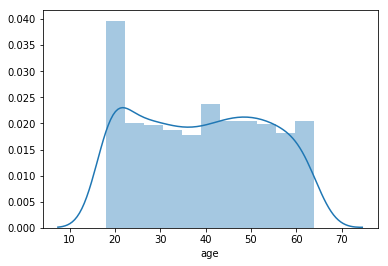

In [7]:
sns.distplot(insurance_data['age'])
plt.show()

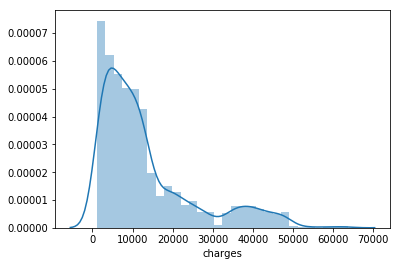

In [8]:
sns.distplot(insurance_data['charges'])
plt.show()

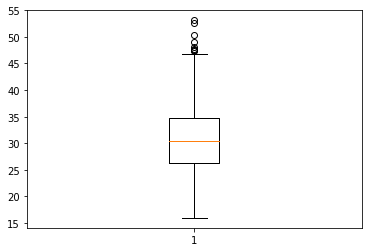

In [9]:
### checking for outliers #####
plt.boxplot(insurance_data['bmi'])
plt.show()                                                

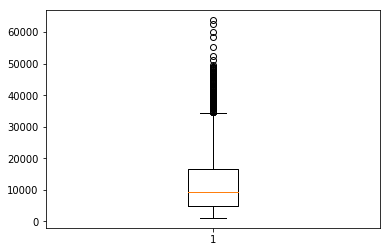

In [10]:
plt.boxplot(insurance_data['charges'])
plt.show()

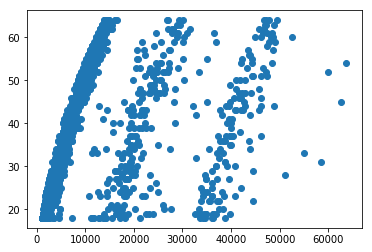

In [11]:
#############bivariate analysis########
plt.scatter(insurance_data['charges'],insurance_data['age'])
plt.show()

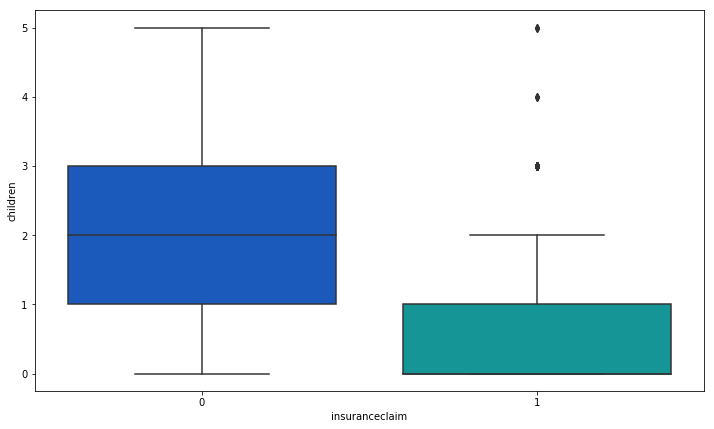

In [12]:
plt.figure(figsize=(12,7))
sns.boxplot(x='insuranceclaim',y='children',data=insurance_data,palette='winter')


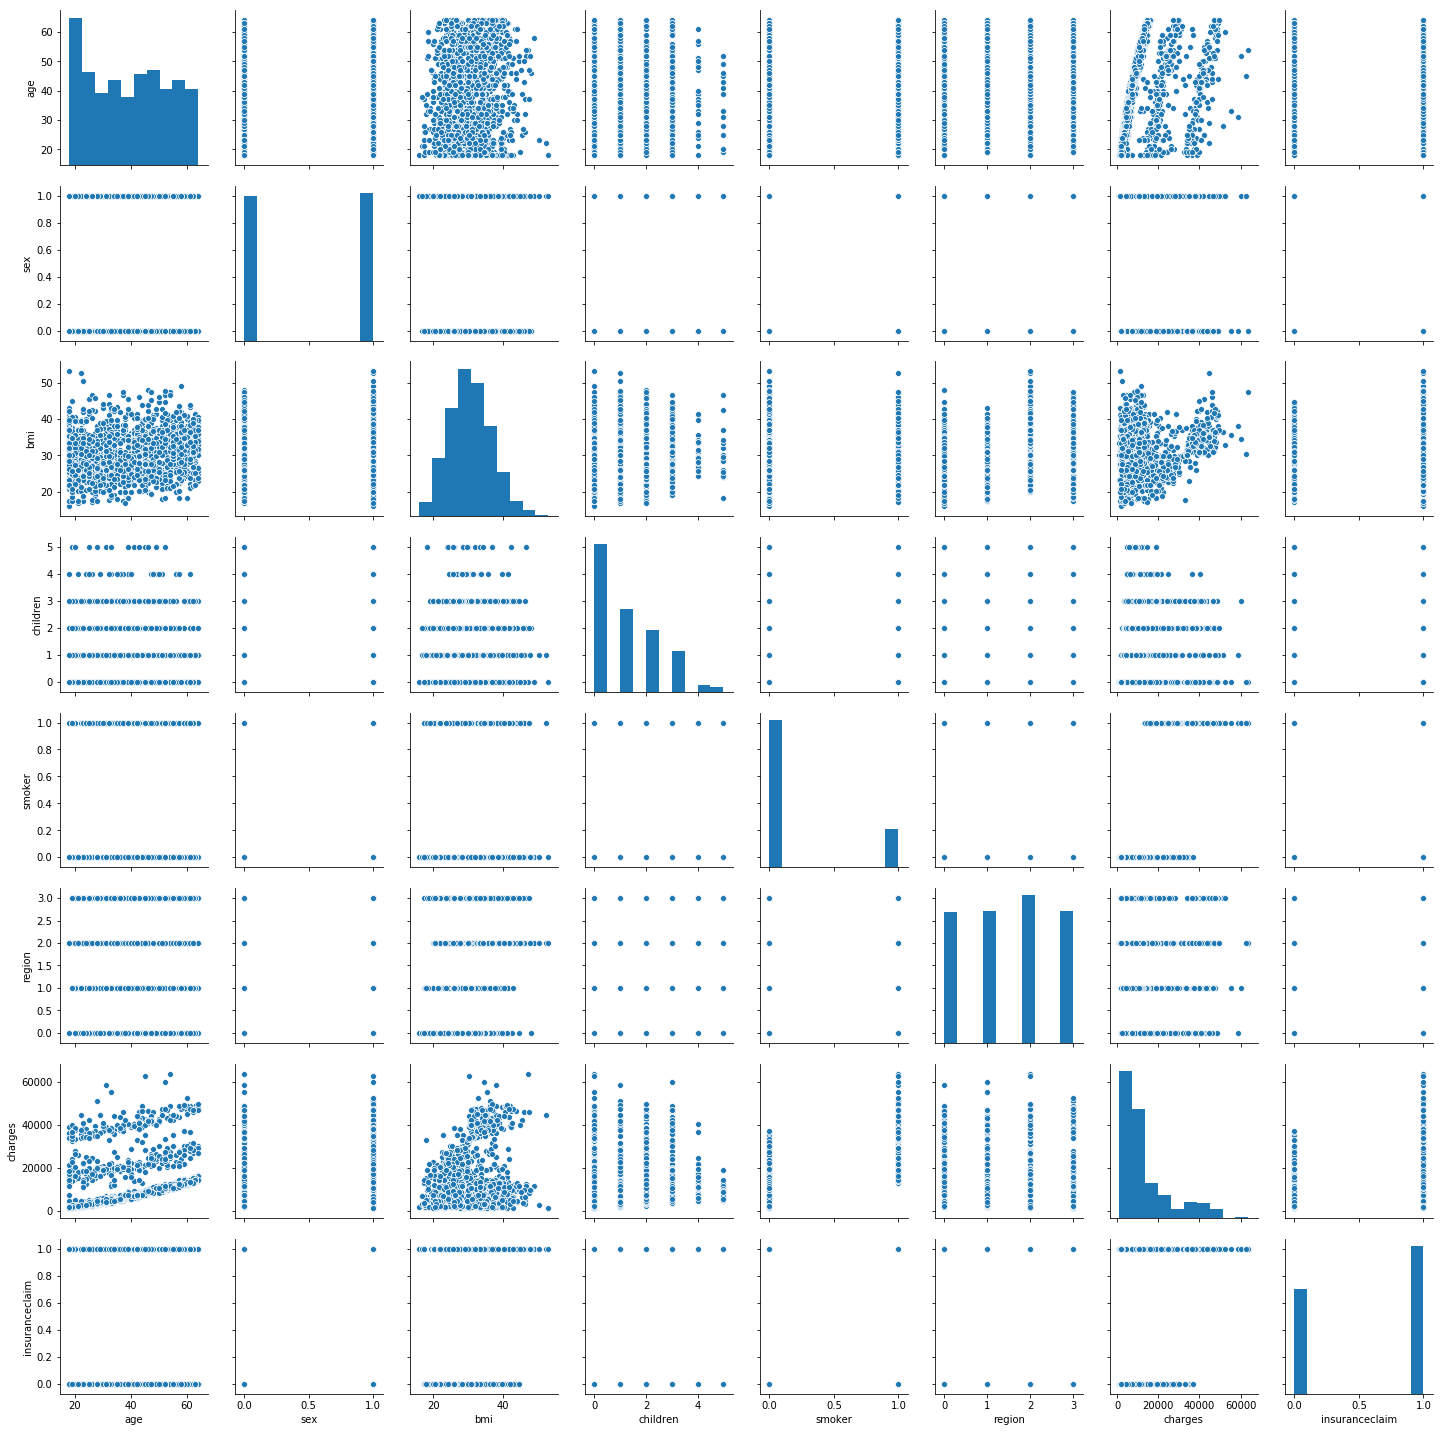

In [13]:
sns.pairplot(insurance_data)

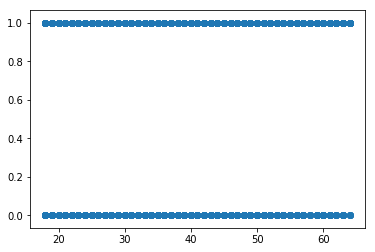

In [14]:
#############bivariate analysis##############
x=insurance_data['age']
y=insurance_data['insuranceclaim']
plt.scatter(x,y)
plt.show()

In [15]:
### checking the outliers######
########### importing the library########
from scipy.stats import zscore
z = np.abs(zscore(insurance_data))
z


array([[1.43876426, 1.0105187 , 0.45332   , ..., 1.34390459, 0.2985838 ,
        0.84190989],
       [1.50996545, 0.98959079, 0.5096211 , ..., 0.43849455, 0.95368917,
        0.84190989],
       [0.79795355, 0.98959079, 0.38330685, ..., 0.43849455, 0.72867467,
        1.18777557],
       ...,
       [1.50996545, 1.0105187 , 1.0148781 , ..., 0.43849455, 0.96159623,
        0.84190989],
       [1.29636188, 1.0105187 , 0.79781341, ..., 1.34390459, 0.93036151,
        1.18777557],
       [1.55168573, 1.0105187 , 0.26138796, ..., 0.46691549, 1.31105347,
        0.84190989]])

In [16]:
threshold = 3
print(np.where(z>3))

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
        640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,
       1130, 1146, 1230, 1245, 1272, 1300, 1317], dtype=int64), array([3, 6, 3, 2, 3, 3, 3, 3, 6, 3, 6, 3, 6, 2, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 6, 6, 3, 3, 6, 2], dtype=int64))


# correlation map

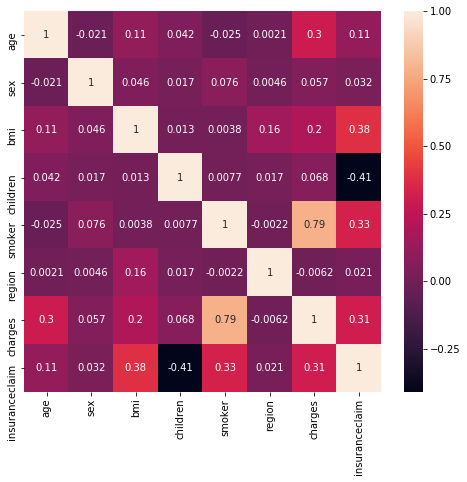

In [17]:
corr_hmap = insurance_data.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [18]:
# variable children is highly negative correlated 
# so have to drop variable children
insurance_data.drop('children',axis=1,inplace=True)
insurance_data.describe()

,age,sex,bmi,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,1.000000,3.000000,63770.428010,1.000000


In [19]:
##### removing the outliers########
insurance = insurance_data[(z<3).all(axis=1)]
insurance.shape

(1309, 7)

In [20]:
insurance.describe()

,age,sex,bmi,smoker,region,charges,insuranceclaim
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,39.262032,0.502674,30.584037,0.202445,1.505730,13089.622269,0.586707
std,14.085397,0.500184,5.975320,0.401975,1.105037,11738.168486,0.492613
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.315000,0.000000,1.000000,4686.388700,0.000000
50%,39.000000,1.000000,30.305000,0.000000,2.000000,9377.904700,1.000000
75%,51.000000,1.000000,34.580000,0.000000,2.000000,16577.779500,1.000000
max,64.000000,1.000000,48.070000,1.000000,3.000000,49577.662400,1.000000


In [21]:
############ selecting the independent and dependent variables#############
x = insurance.iloc[:,0:-1].values
y = insurance.iloc[:,-1].values

# SPLITTING THE DATASET

In [22]:
# Importing the library
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.22)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)


(1021, 6) (288, 6) (1021,) (288,)


In [23]:
y_train = y_train.reshape(-1,1)
y_train.shape

(1021, 1)

In [24]:
y_test = y_test.reshape(-1,1)
y_test.shape

(288, 1)

# MULTIPLE REGRESSION  

In [25]:
# Import the library
from sklearn.linear_model import LogisticRegression

In [26]:
regressor = LogisticRegression()
regressor.fit(x_train,y_train.ravel())


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
y_pred = regressor.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [28]:
# checking the score of the model
# importing the libraries
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score

In [29]:
score=accuracy_score(y_pred,y_test)
print(score)

0.6388888888888888


In [30]:
matrix = confusion_matrix(y_pred,y_test)
matrix

array([[ 20,   8],
       [ 96, 164]], dtype=int64)

In [31]:
f_score = f1_score(y_test,y_pred)
f_score

0.7592592592592593

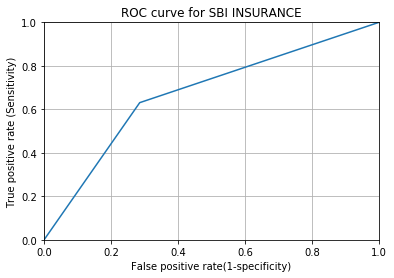

In [32]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
fpr,tpr,thresholds = metrics.roc_curve(y_pred,y_test)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC curve for SBI INSURANCE')
plt.xlabel('False positive rate(1-specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

# DECISION TREE ALGORITHM

In [33]:
# Importing the library
from sklearn.tree import DecisionTreeClassifier

In [34]:
cls = DecisionTreeClassifier(criterion='entropy',min_samples_split=2,random_state=0)

In [35]:
cls.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [36]:
pred_y = cls.predict(x_test)
print(pred_y)

[1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 0
 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1
 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0
 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1
 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0
 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0
 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0]


In [37]:
matrix = confusion_matrix(pred_y,y_test)
matrix

array([[ 87,  37],
       [ 29, 135]], dtype=int64)

In [38]:
score = accuracy_score(pred_y,y_test)
score

0.7708333333333334

In [39]:
# decision tree accuracy score is greater than multiple regression model

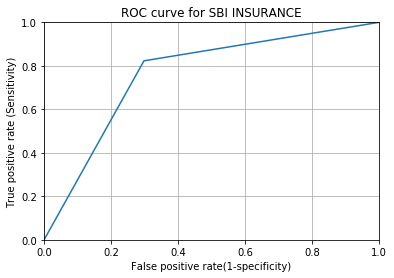

In [40]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
fpr,tpr,thresholds = metrics.roc_curve(pred_y,y_test)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC curve for SBI INSURANCE')
plt.xlabel('False positive rate(1-specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

# RANDOM FOREST ALGORITHM

In [41]:
# Importing the library
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(max_depth=2)
regressor.fit(x_train,y_train.ravel())


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [42]:
pred = regressor.predict(x_test)
print(pred)

[0.70322176 0.06155238 0.92787485 0.70322176 0.69560509 0.61200475
 0.61200475 0.61200475 0.92787485 0.72194655 0.61200475 0.92787485
 0.70322176 0.92787485 0.61200475 0.06155238 0.06155238 0.61200475
 0.61200475 0.61200475 0.92787485 0.70322176 0.61200475 0.92787485
 0.70322176 0.92787485 0.92787485 0.92787485 0.06155238 0.69560509
 0.61200475 0.92787485 0.06155238 0.61200475 0.61200475 0.70322176
 0.70322176 0.67221015 0.61200475 0.70322176 0.61200475 0.06155238
 0.61200475 0.61200475 0.69560509 0.92787485 0.61200475 0.61200475
 0.69560509 0.61200475 0.70322176 0.61200475 0.69560509 0.61200475
 0.61200475 0.61200475 0.67221015 0.70322176 0.70322176 0.61200475
 0.61200475 0.70322176 0.61200475 0.61200475 0.06155238 0.06155238
 0.92787485 0.06155238 0.92787485 0.70322176 0.06155238 0.61200475
 0.61200475 0.61200475 0.61200475 0.06155238 0.70322176 0.61200475
 0.70322176 0.61200475 0.69560509 0.61200475 0.61200475 0.61200475
 0.61200475 0.67221015 0.92787485 0.92787485 0.92787485 0.9278

In [43]:
# random forest is predicting the model in float form so not using this model anyfurther.

# KNN MODEL

In [44]:
from sklearn.neighbors import KNeighborsRegressor

In [45]:
regressor = KNeighborsRegressor(n_neighbors=5)
regressor.fit(x_train,y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [46]:
predicted_y = regressor.predict(x_test)
print(predicted_y)

[[1. ]
 [0.4]
 [1. ]
 [0.8]
 [0.6]
 [0.4]
 [0.2]
 [0.2]
 [1. ]
 [0.8]
 [0.4]
 [0.6]
 [0.8]
 [0.8]
 [0.2]
 [0.4]
 [0. ]
 [0. ]
 [0.4]
 [0.6]
 [0.8]
 [1. ]
 [0.6]
 [0.4]
 [0.8]
 [0.6]
 [1. ]
 [0.8]
 [0.4]
 [0.6]
 [0.4]
 [1. ]
 [0.4]
 [0.2]
 [0.4]
 [1. ]
 [0.6]
 [0.6]
 [0.8]
 [1. ]
 [0.2]
 [0.6]
 [0. ]
 [0.4]
 [0.8]
 [0.6]
 [0.4]
 [0. ]
 [1. ]
 [0.6]
 [0.4]
 [0.2]
 [0.4]
 [0.4]
 [0. ]
 [0.6]
 [0.6]
 [0.4]
 [0.6]
 [0.6]
 [0.2]
 [1. ]
 [0.4]
 [0.4]
 [0.4]
 [0.4]
 [1. ]
 [0.6]
 [0.6]
 [0.8]
 [0.8]
 [0. ]
 [0. ]
 [0.2]
 [1. ]
 [0. ]
 [0.6]
 [0.4]
 [0.4]
 [0.6]
 [0.4]
 [1. ]
 [0.4]
 [0. ]
 [0. ]
 [0.8]
 [1. ]
 [1. ]
 [0.2]
 [0.8]
 [0.8]
 [0.4]
 [0.6]
 [0.6]
 [0.6]
 [0.2]
 [0.2]
 [0.6]
 [0. ]
 [0.4]
 [0.6]
 [0.2]
 [0.2]
 [1. ]
 [0.4]
 [0.6]
 [0.2]
 [0.6]
 [1. ]
 [0.6]
 [1. ]
 [0.4]
 [1. ]
 [0.8]
 [0.4]
 [0.6]
 [0.6]
 [0.8]
 [0.8]
 [1. ]
 [0.6]
 [0.4]
 [0.8]
 [0.4]
 [0.4]
 [0. ]
 [0.6]
 [0.6]
 [1. ]
 [1. ]
 [0.6]
 [0.8]
 [0.6]
 [0.6]
 [0.6]
 [0.6]
 [0.8]
 [0.6]
 [0.6]
 [0. ]
 [0.6]
 [0.6]
 [0.4]

In [47]:
############# ON THE BASIS OF ROC CURVE DECISION TREE IS BEST MODEL FOR THE SBI INSURANCE CLAIM DATASET